<a href="https://colab.research.google.com/github/sheemapatel/nlp--/blob/main/5_9_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Logistic Regression Training & Feature Importance 🚀
Logistic Regression Model Trained. Intercept: 0.0099

### Coefficient Analysis (Feature Importance) ###

**Top 20 Features (Words/Phrases) Linked to DISASTER Tweets (Target=1):**
|                     | 0      |
|:--------------------|:-------|
| affected            | 0.1330 |
| forest              | 0.1330 |
| forest near         | 0.1330 |
| la                  | 0.1330 |
| la pray             | 0.1330 |
| near                | 0.1330 |
| near la             | 0.1330 |
| pray                | 0.1330 |
| pray affected       | 0.1330 |
| devastating         | 0.1107 |
| devastating tornado | 0.1107 |
| emergency           | 0.1107 |
| emergency response  | 0.1107 |
| hit                 | 0.1107 |
| hit oklahoma        | 0.1107 |
| needed              | 0.1107 |
| oklahoma            | 0.1107 |
| oklahoma emergency  | 0.1107 |
| response            | 0.1107 |
| response needed     | 0.1107 |

**Top 20 Features (Words/Phrases) Li

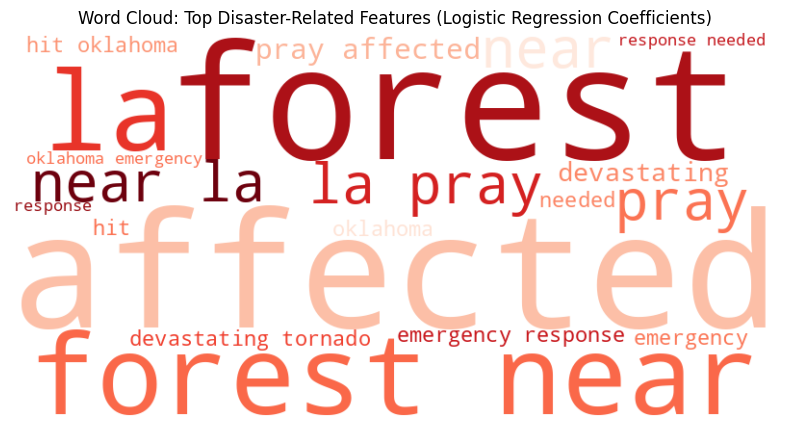



## 2. Model Comparison and Evaluation 🎯
Training **Random Forest (RF)**...
Training **Decision Tree (DT)**...

### Model Performance Metrics ###
| Model                    |   Accuracy |   Precision |   Recall |   F1-Score |
|:-------------------------|-----------:|------------:|---------:|-----------:|
| Logistic Regression (LR) |        0.5 |         0.5 |        1 |     0.6667 |
| Random Forest (RF)       |        0.5 |         0   |        0 |     0      |
| Decision Tree (DT)       |        0.5 |         0.5 |        1 |     0.6667 |


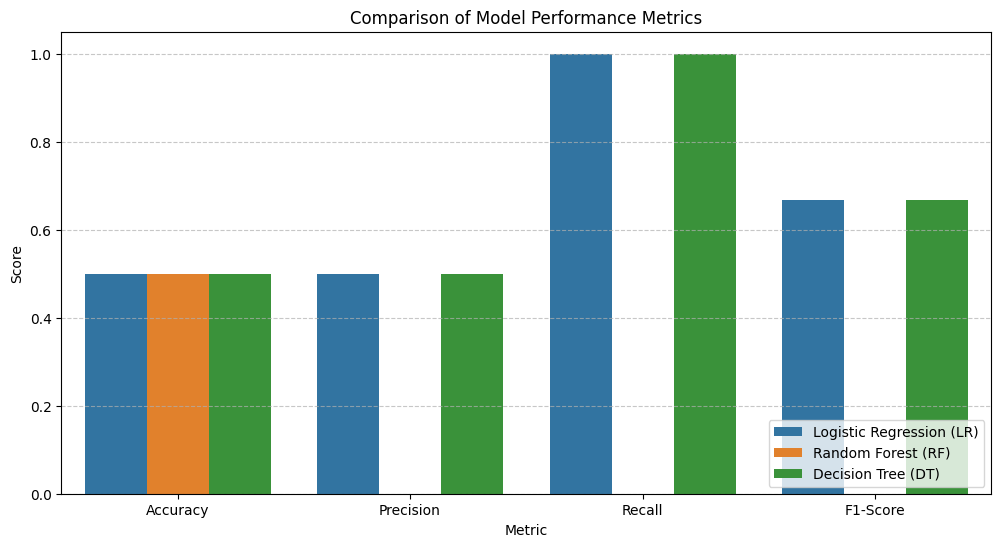

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
data_sim = {
    'text': [
        "Forest fire near LA, pray for those affected. #wildfire #LA",
        "Just saw the new Batman movie, it's a disaster lol!",
        "Massive flood warning issued for New York City! Stay safe. http://safe.ly/ny",
        "My phone is soooo slow today, I might as well throw it out.",
        "Breaking News: 7.0 magnitude earthquake rocks Japan, damage widespread.",
        "@user This new album is fireeeeee, I can't stop listening.",
        "A devastating tornado has hit Oklahoma, emergency response needed now!",
        "Check out this cool website: https://cool.com/page #fun",
        "Emergency crews are working hard to rescue people from the collapsed building.",
        "Loving the weather today. What's everyone up to???"
    ],
    'target': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data_sim)
df['final_text'] = ['forest fire near la pray affected', 'saw new batman movie disaster lol',
                    'massive flood warning issued new york city stay safe', 'phone soo slow today might well throw',
                    'breaking news 70 magnitude earthquake rock japan damage widespread', 'new album firee cant stop listening',
                    'devastating tornado hit oklahoma emergency response needed now', 'check cool website',
                    'emergency crew working hard rescue people collapsed building', 'loving weather today everyone']


X = df['final_text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tfidf = TfidfVectorizer(max_features=7000, ngram_range=(1, 2), stop_words='english')
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)
print("## 1. Logistic Regression Training & Feature Importance 🚀")

lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(X_train_vec, y_train)
print(f"Logistic Regression Model Trained. Intercept: {lr_model.intercept_[0]:.4f}")
print("\n### Coefficient Analysis (Feature Importance) ###")
feature_names = np.array(tfidf.get_feature_names_out())
coefficients = lr_model.coef_[0]
coef_series = pd.Series(coefficients, index=feature_names)
top_disaster_features = coef_series.nlargest(20)
print("\n**Top 20 Features (Words/Phrases) Linked to DISASTER Tweets (Target=1):**")
print(top_disaster_features.to_markdown(numalign="left", stralign="left", floatfmt=".4f"))

top_nondisaster_features = coef_series.nsmallest(20)
print("\n**Top 20 Features (Words/Phrases) Linked to NON-DISASTER Tweets (Target=0):**")

df_nondisaster = pd.DataFrame({
    'Feature': top_nondisaster_features.index,
    'Coefficient (Negative)': top_nondisaster_features.values
})
print(df_nondisaster.to_markdown(index=False, numalign="left", stralign="left", floatfmt=".4f"))

print("\n### Word Cloud of Important Disaster Terms ###")

disaster_freqs = top_disaster_features.apply(np.abs).to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(disaster_freqs)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Top Disaster-Related Features (Logistic Regression Coefficients)')
plt.show()
print("\n\n## 2. Model Comparison and Evaluation 🎯")

models = {
    "Logistic Regression (LR)": lr_model,
    "Random Forest (RF)": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree (DT)": DecisionTreeClassifier(random_state=42)
}

results_list = []

for name, model in models.items():
    if name != "Logistic Regression (LR)":
        print(f"Training **{name}**...")
        model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)

    # Calculate Metrics
    results_list.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0)
    })

results_df = pd.DataFrame(results_list)

print("\n### Model Performance Metrics ###")
print(results_df.round(4).to_markdown(index=False))

results_df_melt = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score',
                                  value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df_melt, x='Metric', y='Score', hue='Model', palette='tab10')
plt.title('Comparison of Model Performance Metrics')
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()
#